In [1]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
np.random.seed(0)

def bern_sampling(p, n):
    return (np.random.rand(n) <= p).astype(np.int_)

In [2]:
experiments = []
n= 1000000
for i in range(n):
    experiments.append(bern_sampling(0.5, 20))

In [3]:
alfa = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

In [4]:
empirical_freqs = []
for i in range(len(experiments)):
    empirical_freqs.append(np.sum(experiments[i])/len(experiments[i]))

In [5]:
counters = []
for a in alfa:
    c = 0
    for x in empirical_freqs:
        if x >= a :
            c +=1
    counters.append(c)

In [6]:
counters

[588443, 411927, 251968, 131582, 57555, 20586, 5985, 1341, 210, 16, 1]

Text(0, 0.5, 'X')

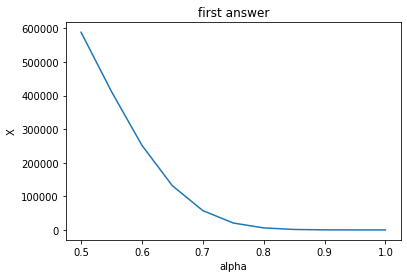

In [7]:
plt.plot(alfa, counters)
plt.title("first answer")
plt.xlabel("alpha")
plt.ylabel("X")

In [8]:
prob_emp_freq = [x/n for x in counters]

In [9]:
prob_emp_freq

[0.588443,
 0.411927,
 0.251968,
 0.131582,
 0.057555,
 0.020586,
 0.005985,
 0.001341,
 0.00021,
 1.6e-05,
 1e-06]

In [10]:
#right_markov = [(counters[i] * prob_emp_freq[i]) / alfa[i] for i in range(len(alfa))]

In [11]:
#right_markov

In [12]:
#DOVREBBE BASTARMI LA PARTE DESTRA DELLA DISUG.
#markov's all variable are i.i.d, the singel random variable is toss a coin, so the E[X] = 0.5 ? for all r.v.

exp_val = 0.5
markovs = []
for i in range(len(alfa)):
    markovs.append(exp_val/alfa[i])



''' 
markovs = []
for j in range(len(right_markov)):
    c = 0
    for i in range(len(counters)):   
        if counters[i] <= right_markov[j]:
            c+=1
    markovs.append(c/len(counters))
'''

' \nmarkovs = []\nfor j in range(len(right_markov)):\n    c = 0\n    for i in range(len(counters)):   \n        if counters[i] <= right_markov[j]:\n            c+=1\n    markovs.append(c/len(counters))\n'

In [13]:
markovs

[1.0,
 0.9090909090909091,
 0.8333333333333334,
 0.7692307692307692,
 0.7142857142857143,
 0.6666666666666666,
 0.625,
 0.5882352941176471,
 0.5555555555555556,
 0.5263157894736842,
 0.5]

In [14]:
plt.plot(alfa, markovs)
plt.title("Markov's bound")
plt.xlabel("alpha")
plt.ylabel("Markov's bound")

Text(0, 0.5, "Markov's bound")

In [15]:
#VARIANCE: https://math.stackexchange.com/questions/3082993/tossing-a-fair-coin-n-times-what-is-the-variance
variance = 0.25 #variance x[1] = 1/4

In [16]:
#chebychev:
cheb_right = []
n = 20 #num ind rand variables, page 11 seldin
for i in range(len(alfa)):
    cheb_right.append((variance/(alfa[i]**2))) #* n?, why in the discussion teh TA says there's somethign to adapt?

In [17]:
cheb_right

[1.0,
 0.8264462809917354,
 0.6944444444444444,
 0.5917159763313609,
 0.5102040816326532,
 0.4444444444444444,
 0.39062499999999994,
 0.34602076124567477,
 0.30864197530864196,
 0.2770083102493075,
 0.25]

In [18]:
'''
cheb = []
for i in range(len(alfa)):
    c = 0
    for j in range(len(alfa)):
        if counters[j] <= cheb_right[i]:
            c+=1    
    cheb.append(c/len(counters))
'''

'\ncheb = []\nfor i in range(len(alfa)):\n    c = 0\n    for j in range(len(alfa)):\n        if counters[j] <= cheb_right[i]:\n            c+=1    \n    cheb.append(c/len(counters))\n'

In [19]:
plt.plot(alfa, cheb_right)
plt.plot(alfa, markovs)


In [36]:
#HOEFFDING'S
import math
hoeff = []
n = 20
for i in range(len(alfa)):
    hoeff.append(math.exp((-2*(alfa[i]**2))/n))

In [37]:
hoeff

[0.9753099120283326,
 0.9702029524890169,
 0.9646402934831231,
 0.9586300930895252,
 0.9521811296985049,
 0.9453027806520595,
 0.9380049995307295,
 0.9302982921639203,
 0.922193691444608,
 0.91370273103288,
 0.9048374180359595]

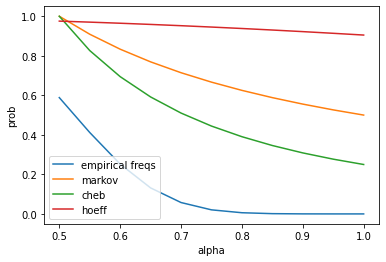

In [38]:
plt.plot(alfa, prob_emp_freq, label = 'empirical freqs')
plt.plot(alfa, markovs, label = 'markov')
plt.plot(alfa, cheb_right, label = 'cheb')
plt.plot(alfa, hoeff, label = 'hoeff')
plt.xlabel('alpha')
plt.ylabel('prob')
plt.legend()

In [29]:
#7. For α = 1 and α = 0.95 calculate the exact probability P
count = 0
for x in empirical_freqs:
    if x >= 0.95:
        count +=1
        
count/1000000

1.6e-05

In [24]:
count = 0
for x in empirical_freqs:
    if x >= 1:
        count +=1
        
count/1000000

1e-06

In [25]:
#compare the four plots?
#I think the idea is to compare the actual values to the boundaries and how tight they are with respect to the actual empirical freqs. but hoeffding shouldn't be the tightest??
#because hoeff decrease exponentially while cheb 1/n
#le empirical freqs mi dicono che con alpha 0.7 ho prob di 0.1 di superarlo, i bounds mi dicono AL MASSIMO hai un tot di prob di superarlo, e markov dovrebbe essere il meno tight credo
#+ sono tight + empirical loss = expected loss in ML

# 2.b

In [69]:
#2.b
experiments = []
n= 1000000
for i in range(n):
    experiments.append(bern_sampling(0.1, 20))

In [70]:
alfa = [0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

In [71]:
empirical_freqs = []
for i in range(len(experiments)):
    empirical_freqs.append(np.sum(experiments[i])/len(experiments[i]))

In [72]:
counters = []
for a in alfa:
    c = 0
    for x in empirical_freqs:
        if x >= a :
            c +=1
    counters.append(c)

In [73]:
n = 1000000
prob_emp_freq = [x/n for x in counters]

In [74]:
prob_emp_freq

[0.608412,
 0.323062,
 0.132817,
 0.043364,
 0.011323,
 0.002464,
 0.000435,
 6.3e-05,
 4e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [75]:
exp_val = 0.1
markovs = []
for i in range(len(alfa)):
    markovs.append(exp_val/alfa[i])

In [76]:
markovs

[1.0,
 0.6666666666666667,
 0.5,
 0.4,
 0.33333333333333337,
 0.28571428571428575,
 0.25,
 0.22222222222222224,
 0.2,
 0.18181818181818182,
 0.16666666666666669,
 0.15384615384615385,
 0.14285714285714288,
 0.13333333333333333,
 0.125,
 0.11764705882352942,
 0.11111111111111112,
 0.10526315789473685,
 0.1]

In [77]:
variance = 0.09

In [78]:
cheb_right = []
for i in range(len(alfa)):
    cheb_right.append(variance/alfa[i]**2)

In [79]:
cheb_right

[8.999999999999998,
 4.0,
 2.2499999999999996,
 1.44,
 1.0,
 0.7346938775510204,
 0.5624999999999999,
 0.4444444444444444,
 0.36,
 0.29752066115702475,
 0.25,
 0.21301775147928992,
 0.1836734693877551,
 0.16,
 0.14062499999999997,
 0.12456747404844291,
 0.1111111111111111,
 0.0997229916897507,
 0.09]

In [80]:
cheb_right = [1 if x >= 1 else x for x in cheb_right]

In [81]:
cheb_right

[1,
 1,
 1,
 1,
 1,
 0.7346938775510204,
 0.5624999999999999,
 0.4444444444444444,
 0.36,
 0.29752066115702475,
 0.25,
 0.21301775147928992,
 0.1836734693877551,
 0.16,
 0.14062499999999997,
 0.12456747404844291,
 0.1111111111111111,
 0.0997229916897507,
 0.09]

In [82]:
import math
hoeff = []
n = 20
for i in range(len(alfa)):
    hoeff.append(math.exp((-2*(alfa[i]**2))/n))

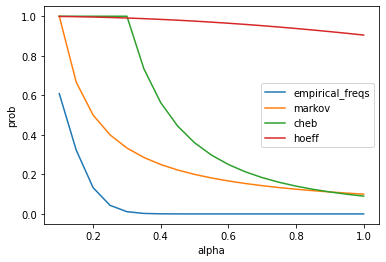

In [83]:
plt.plot(alfa, prob_emp_freq, label = 'empirical_freqs')
plt.plot(alfa, markovs, label = 'markov')
plt.plot(alfa, cheb_right, label = 'cheb')
plt.plot(alfa, hoeff, label = 'hoeff')
plt.xlabel('alpha')
plt.ylabel('prob')
plt.legend()

In [84]:
count = 0
for x in empirical_freqs:
    if x >= 1:
        count +=1
        
count/1000000

0.0

In [85]:
count = 0
for x in empirical_freqs:
    if x >= 0.95:
        count +=1
        
count/1000000

0.0

In [86]:
#2.c discuss the results ? 